In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, time
from functions_queueing_system import *
from functions_extremum_seeking import *
import random

In [2]:
np.random.seed(0)
random.seed(0)

In [3]:
saved_results_firsthalf = np.load('./results/algo_performance_qs_first-10.npz', allow_pickle=True)
saved_results_thirdquarter = np.load('./results/algo_performance_qs_first-15.npz', allow_pickle=True)
saved_results_fourthquarter = np.load('./results/algo_performance_qs_first-20.npz', allow_pickle=True)


In [4]:
M = saved_results_firsthalf['M']
K = saved_results_firsthalf['K']
T = saved_results_firsthalf['T']
dep_rate = saved_results_firsthalf['dep_rate']
eps = saved_results_firsthalf['eps']
gamma = saved_results_firsthalf['gamma']
alpha = saved_results_firsthalf['alpha']
beta = saved_results_firsthalf['beta']
avg_over = saved_results_firsthalf['avg_over']
num_init_vals = saved_results_firsthalf['num_init_vals']
num_true_vals = saved_results_firsthalf['num_true_vals']
theta_star_all = saved_results_firsthalf['theta_star_all']

In [5]:
index_true = 7
index_init = 4

if index_true<int(num_true_vals/2):
    results_all1 = saved_results_firsthalf['results_all']
    resultsA = results_all1[index_true][index_init]
elif index_true<int(3*num_true_vals/4):
    results_all2 = saved_results_thirdquarter['results_all']
    resultsA = results_all2[index_true][index_init]
else:
    results_all3 = saved_results_fourthquarter['results_all']
    resultsA = results_all3[index_true][index_init]

In [30]:
theta_hat_t_all1 = saved_results_firsthalf['theta_hat_t_all']
theta_hat_t_all2 = saved_results_thirdquarter['theta_hat_t_all']
theta_hat_t_all3 = saved_results_fourthquarter['theta_hat_t_all']

In [37]:
theta_hat_t_all = np.zeros(theta_hat_t_all1.shape)
for i in range(num_true_vals):
    if i<int(num_true_vals/2):
        theta_hat_t_all[:,:,i] = theta_hat_t_all1[:,:,i]
    elif i<int(3*num_true_vals/4):
        theta_hat_t_all[:,:,i] = theta_hat_t_all2[:,:,i]
    else:
        theta_hat_t_all[:,:,i] = theta_hat_t_all3[:,:,i]


In [79]:
X_t = resultsA['X']
O_t = resultsA['O']
theta_hat_t = resultsA['theta_hat_t']
pi_t = resultsA['pi_t_all']
omega_t = resultsA['omega_t']
Z_t = resultsA['Z']

In [39]:
list(saved_results_firsthalf.keys())

['M',
 'K',
 'T',
 'dep_rate',
 'eps',
 'gamma',
 'alpha',
 'beta',
 'avg_over',
 'num_init_vals',
 'num_true_vals',
 'theta_init_all',
 'results_all',
 'theta_hat_t_all',
 'theta_hat_mean_all',
 'theta_star_all']

Text(0.5, 0, 'time t')

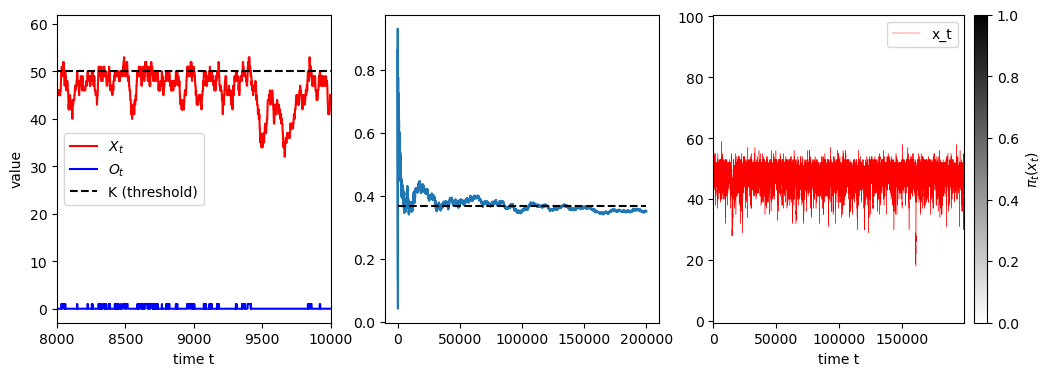

In [40]:
time_axis = np.arange(T)


fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(time_axis, X_t, 'r-')
ax[0].plot(time_axis, O_t, 'b-')
ax[0].plot([time_axis[0], time_axis[-1]],[K, K], 'k--')
ax[0].set_xlabel('time t')
ax[0].set_xlim(8000,10000)
ax[0].set_ylabel('value')
# ax[0].set_title( r"$\bf{(A)}$ "+ r'Latent state and observations')
ax[0].legend([r'$X_t$',r'$O_t$', 'K (threshold)'])

# for i in range(num_init_vals):
#     ax[1].plot(results_all[index_true][i]['theta_hat_t'])
ax[1].plot(theta_hat_t)
ax[1].hlines(theta_star_all[index_true], time_axis[0], time_axis[-1], linestyles='dashed', colors='k')
# ax[1].plot(np.sin(omega_t))
# ax[1].set_xlim(49000, 50000)

ax[2].plot(X_t, 'r', linewidth=0.3)
im = ax[2].imshow(pi_t, origin='lower', cmap='binary', aspect='auto')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im,cax=cax, label=r"$\pi_t(x_t)$")

ax[2].legend(['x_t'])
# ax.set_title(r"Evolution of $\pi_t(x_t)$")
# ax[2].set_title( r"$\bf{(B)}$ "+ r"Belief state $\pi_t(x_t)$, latent state $x_t$ vs t")
ax[2].set_xlabel("time t")

(48000.0, 50000.0)

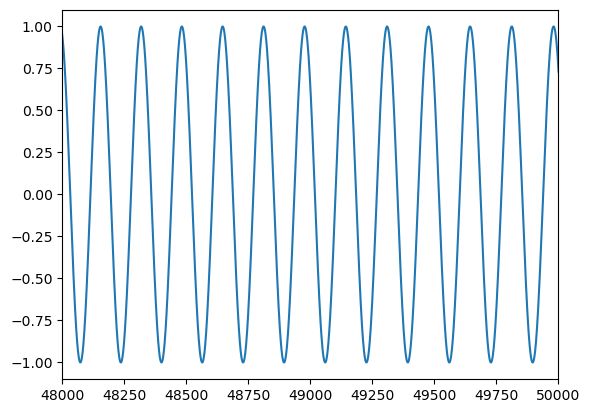

In [41]:
plt.plot(np.sin(omega_t))
plt.xlim(48000, 50000)

Perform Polyak Ruppert Averaging- at t, average over the first t estimates

In [42]:
theta_hat_t_pravg = np.zeros(theta_hat_t_all.shape)
tic = time.time()
for t in range(T):
    if t==0:
        theta_hat_t_pravg[t, :,:] = theta_hat_t_all[0, :, :]
    else:
        theta_hat_t_pravg[t, :,:] = theta_hat_t_pravg[t-1, :,:] + (1/t)*(theta_hat_t_all[t, :, :]-theta_hat_t_pravg[t-1, :,:])
theta_hat_mean_pravg = np.mean(np.mean(theta_hat_t_pravg[-avg_over:,:,:], axis=0), axis=0)
toc = time.time()
print(f"Time taken={toc-tic}s")

Time taken=0.9148006439208984s


Text(0.5, 1.01, 'Estimates')

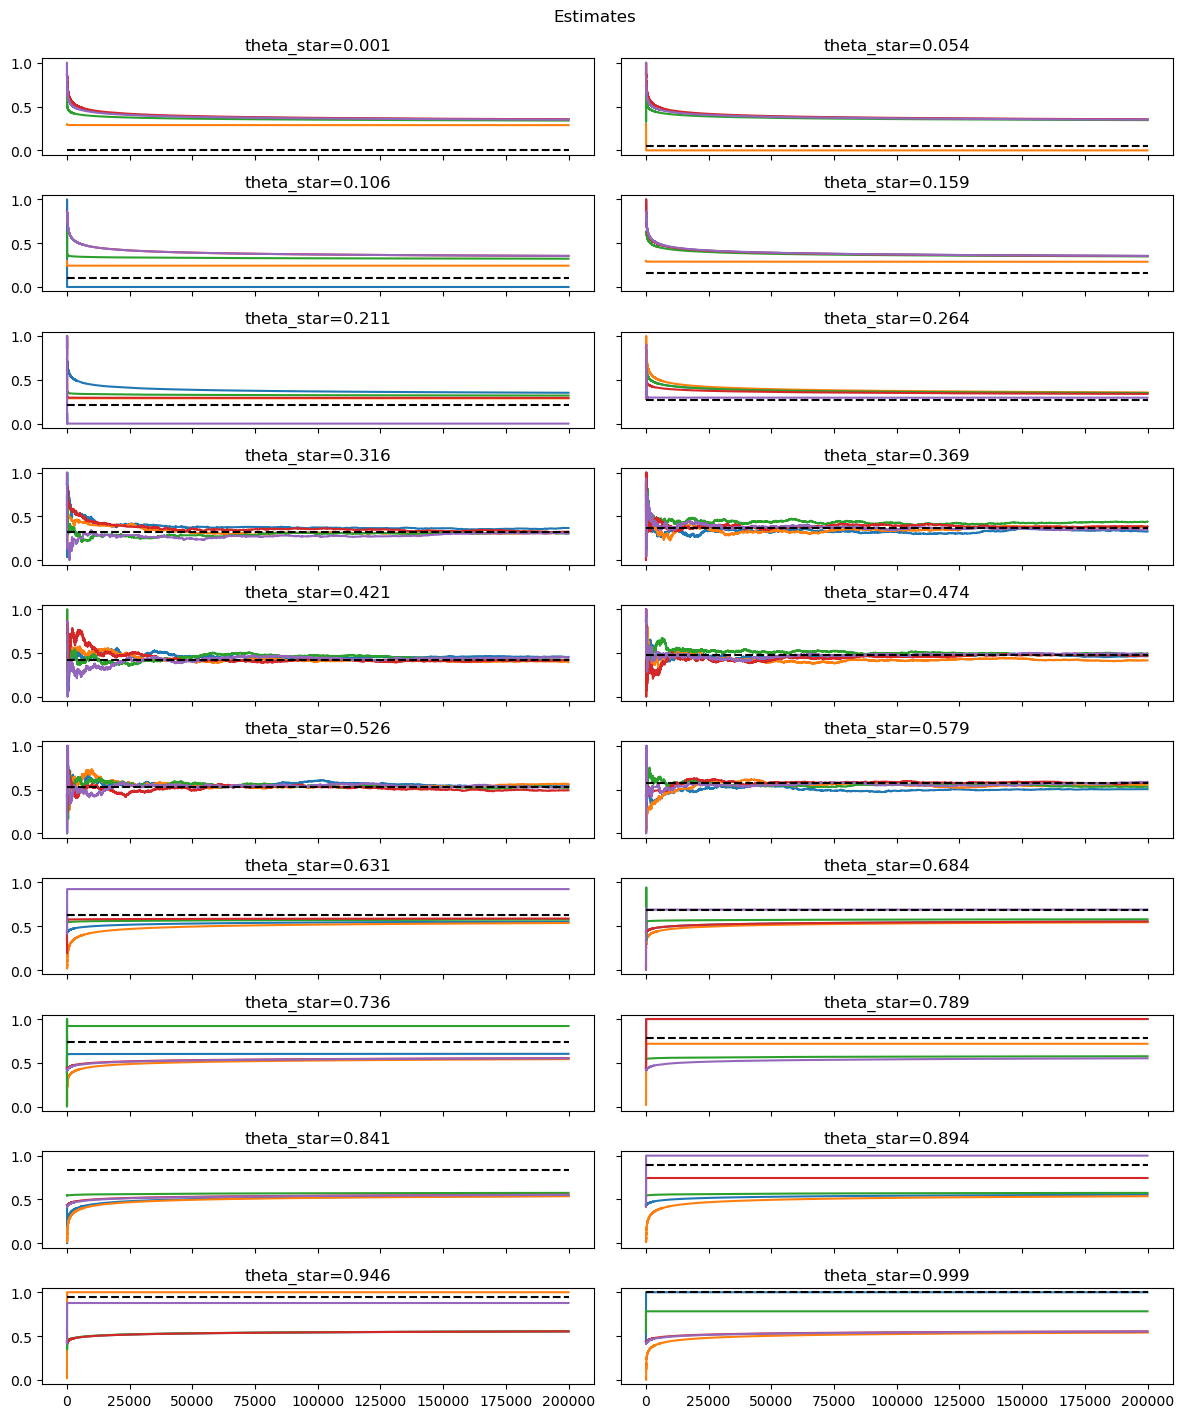

In [46]:
fig, ax = plt.subplots(10, 2, squeeze=True, figsize=(12,14), sharex=True, sharey=True)

for k in range(num_true_vals):
    for i in range(num_init_vals):
        ax[k//2, k%2].plot(theta_hat_t_all[:,i,k])
    ax[k//2, k%2].hlines(theta_star_all[k], 0, T, linestyles='dashed', colors='k')
    ax[k//2, k%2].set_title(f"theta_star={round(theta_star_all[k], 3)}")
plt.tight_layout()
fig.suptitle("Estimates", y=1.01)

Text(0.5, 1.01, 'PR Averages')

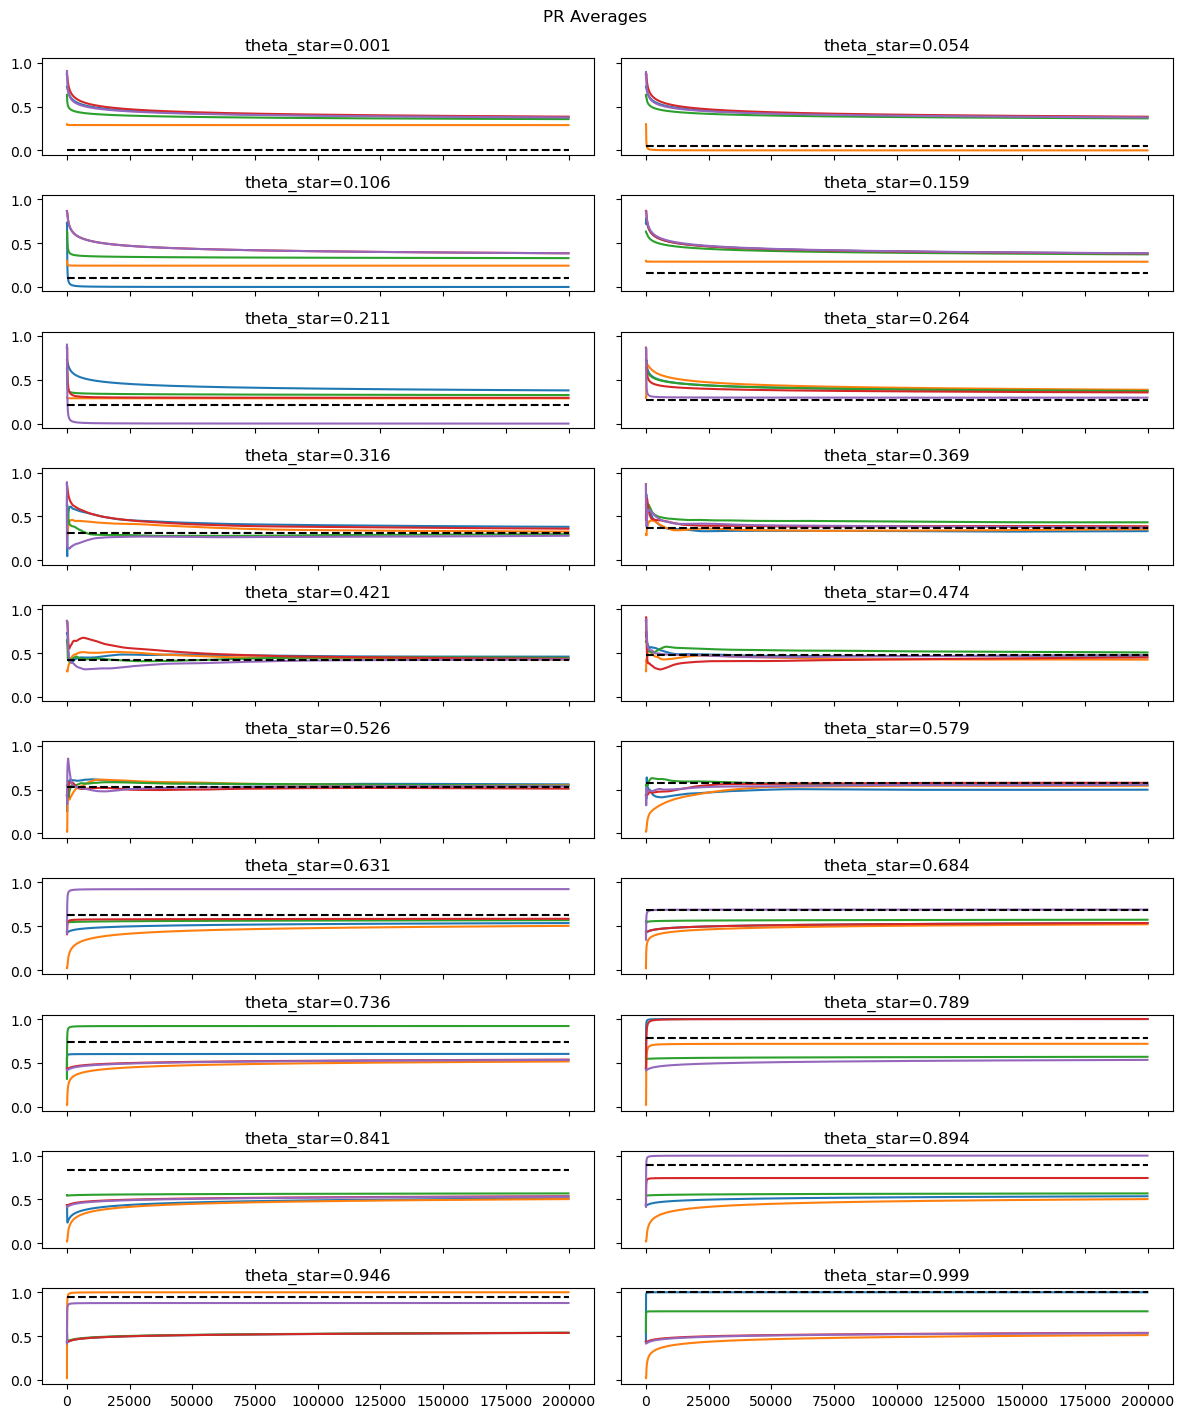

In [47]:
fig, ax = plt.subplots(10, 2, squeeze=True, figsize=(12,14), sharex=True, sharey=True)

for k in range(num_true_vals):
    for i in range(num_init_vals):
        ax[k//2, k%2].plot(theta_hat_t_pravg[:,i,k])
    ax[k//2, k%2].hlines(theta_star_all[k], 0, T, linestyles='dashed', colors='k')
    ax[k//2, k%2].set_title(f"theta_star={round(theta_star_all[k], 3)}")
plt.tight_layout()
fig.suptitle("PR Averages", y=1.01)

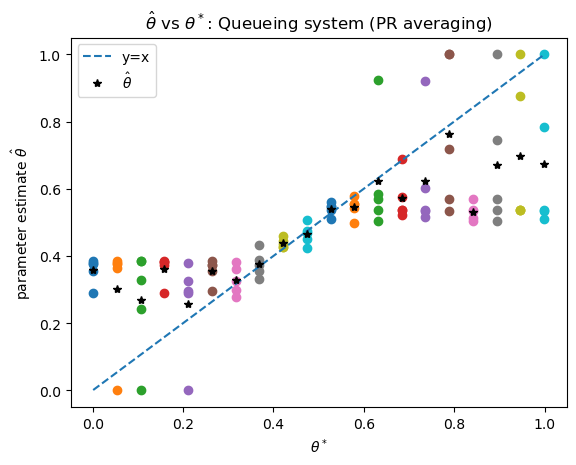

In [48]:
for j in range(num_true_vals):
    plt.scatter([theta_star_all[j] for _ in range(num_init_vals)], theta_hat_t_pravg[-1,:,j])
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
plt.plot(theta_star_all, theta_hat_mean_pravg, 'k*', label=r"$\hat{\theta}$")
plt.xlabel(r"$\theta^*$")
# plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='gray')
plt.ylabel(r"parameter estimate $\hat{\theta}$")
plt.title(r"$\hat{\theta}$ vs $\theta^*$: Queueing system (PR averaging)")
plt.legend()

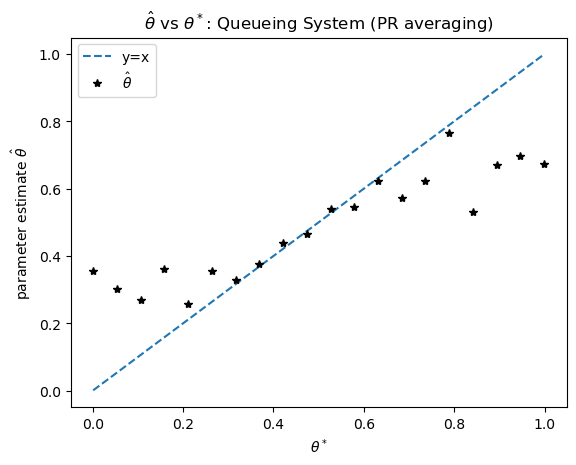

In [49]:
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
plt.plot(theta_star_all, theta_hat_mean_pravg, 'k*', label=r"$\hat{\theta}$")
plt.xlabel(r"$\theta^*$")
# plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='gray')
plt.ylabel(r"parameter estimate $\hat{\theta}$")
plt.title(r"$\hat{\theta}$ vs $\theta^*$: Queueing System (PR averaging)")
plt.legend()

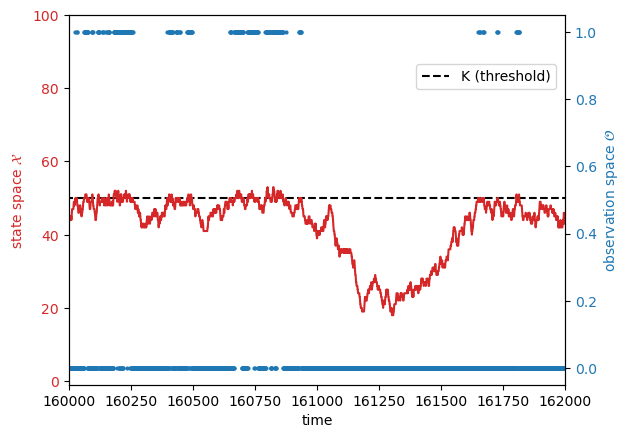

In [71]:
time_axis = np.arange(T)

# x_limits = [80000,80500]

x_limits = [160000, 162000]
fig, ax = plt.subplots(1,1, squeeze=True)

ax.plot([time_axis[0], time_axis[-1]],[K, K], 'k--', label='K (threshold)')
ax.set_ylim(-1,100)
ax.set_xlabel('time')
ax.set_xlim(x_limits[0],x_limits[1])
# ax[0].set_title( r"$\bf{(A)}$ "+ r'Latent state and observations')

ax0b = ax.twinx()

color1 = 'tab:blue'
ax0b.set_ylabel('observation space '+r'$\mathcal{O}$', color=color1)
ax0b.plot(time_axis, O_t, color=color1, linestyle='', marker='o', markersize=2, label=r'$O_t$')
ax0b.tick_params(axis='y', labelcolor=color1)

color0 = 'tab:red'
ax.set_ylabel('state space '+r'$\mathcal{X}$', color=color0)
ax.plot(time_axis, X_t, color=color0)
ax.tick_params(axis='y', labelcolor=color0)

ax.legend(loc=(0.7, 0.8))
# ax0b.legend(loc='upper left')

# plt.savefig('./figures/queueing_system_behaviour.eps', dpi=300)

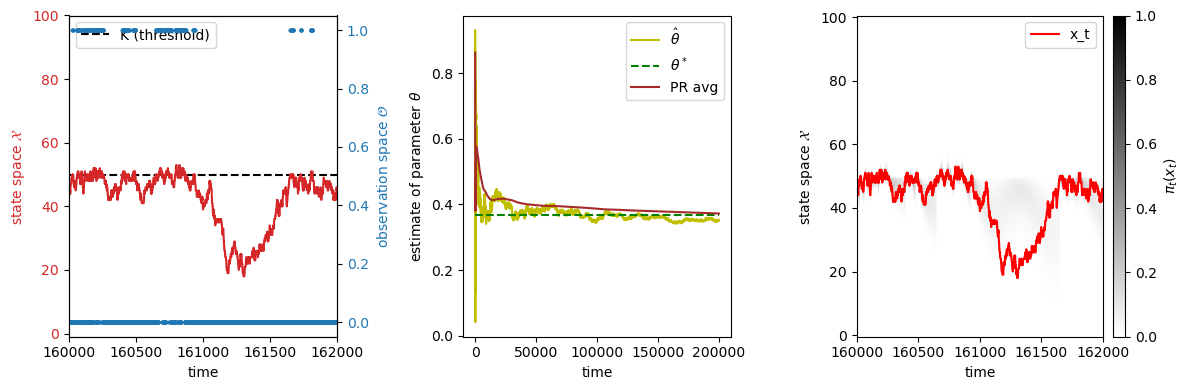

In [72]:
time_axis = np.arange(T)

# x_limits = [110000,110500]
# x_limits = [10000, 10500]
x_limits = [160000, 162000]
fig, ax = plt.subplots(1, 3, figsize=(12, 4), squeeze=True)

ax[0].plot([time_axis[0], time_axis[-1]],[K, K], 'k--', label='K (threshold)')
ax[0].set_ylim(-1,100)
ax[0].set_xlabel('time')
ax[0].set_xlim(x_limits[0],x_limits[1])
# ax[0].set_title( r"$\bf{(A)}$ "+ r'Latent state and observations')

ax0b = ax[0].twinx()

color1 = 'tab:blue'
ax0b.set_ylabel('observation space '+r'$\mathcal{O}$', color=color1)
ax0b.plot(time_axis, O_t, color=color1, linestyle='', marker='o', markersize=2, label=r'$O_t$')
ax0b.tick_params(axis='y', labelcolor=color1)

color0 = 'tab:red'
ax[0].set_ylabel('state space '+r'$\mathcal{X}$', color=color0)
ax[0].plot(time_axis, X_t, color=color0)
ax[0].tick_params(axis='y', labelcolor=color0)

ax[0].legend(loc='upper left')
# ax0b.legend(loc='upper left')



# for i in range(num_init_vals):
#     ax[1].plot(results_all[index_true][i]['theta_hat_t'])
ax[1].plot(theta_hat_t, color='y', label=r'$\hat{\theta}$')
ax[1].hlines(theta_star_all[index_true], time_axis[0], time_axis[-1], linestyles='dashed', colors='g', label=r'$\theta^*$')
ax[1].plot(time_axis, theta_hat_t_pravg[:,index_init, index_true], 'brown', label='PR avg')
ax[1].legend()
# ax[1].plot(np.sin(omega_t))
# ax[1].set_xlim(49000, 50000)
ax[1].set_xlabel('time')
ax[1].set_ylabel(r'estimate of parameter $\theta$')


ax[2].plot(X_t, 'r')#, linewidth=0.3)
im = ax[2].imshow(pi_t, origin='lower', cmap='binary', aspect='auto')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im,cax=cax, label=r"$\pi_t(x_t)$")
ax[2].set_xlim(x_limits[0],x_limits[1])
ax[2].legend(['x_t'])
# ax.set_title(r"Evolution of $\pi_t(x_t)$")
# ax[2].set_title( r"$\bf{(B)}$ "+ r"Belief state $\pi_t(x_t)$, latent state $x_t$ vs t")
ax[2].set_xlabel("time")
ax[2].set_ylabel('state space '+r'$\mathcal{X}$')
# fig.suptitle(r"$\theta^*=$"+str(round(theta_star_all[index_true], 2)))
plt.tight_layout()

In [52]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



C:\Users\Sumedh\AppData\Local\Temp\ipykernel_10640\939175611.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


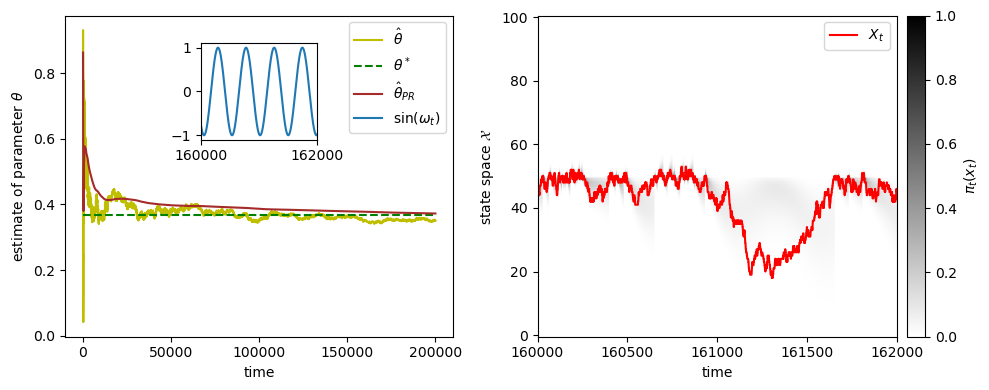

In [76]:
time_axis = np.arange(T)

# x_limits = [80000,80500]
# x_limits = [10000, 10500]
x_limits = [160000, 162000]
fig, ax = plt.subplots(1, 2, figsize=(10, 4), squeeze=True)


# for i in range(num_init_vals):
#     ax[1].plot(results_all[index_true][i]['theta_hat_t'])
ax[0].plot(theta_hat_t, color='y', label=r'$\hat{\theta}$')
ax[0].hlines(theta_star_all[index_true], time_axis[0], time_axis[-1], linestyles='dashed', colors='g', label=r'$\theta^*$')
ax[0].plot(time_axis, theta_hat_t_pravg[:,index_init, index_true], 'brown', label=r'$\hat{\theta}_{PR}$ ')
han, lab = ax[0].get_legend_handles_labels()
# ax[1].plot(np.sin(omega_t))
# ax[1].set_xlim(49000, 50000)
ax[0].set_xlabel('time')
ax[0].set_ylabel(r'estimate of parameter $\theta$')
ax[0].set_xticks([50000*i for i in range(5)])
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axin = inset_axes(ax[0], width="30%", height="30%", borderpad=2, loc="upper center")
axin.plot(np.sin(omega_t), label=r'$\sin(\omega_t)$')
axin.set_xlim(x_limits[0], x_limits[1])
axin.set_xticks(ticks=x_limits)
han_in, lab_in =  axin.get_legend_handles_labels()
ax[0].legend(han+han_in, lab+lab_in)

ax[1].plot(X_t, 'r')#, linewidth=0.3)
im = ax[1].imshow(pi_t, origin='lower', cmap='binary', aspect='auto')
# im = ax[1].imshow(pi_t, origin='lower', cmap='twilight', aspect='auto')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im,cax=cax, label=r"$\pi_t(x_t)$")
ax[1].set_xlim(x_limits[0],x_limits[1])
ax[1].legend([r'$X_t$'])
# ax.set_title(r"Evolution of $\pi_t(x_t)$")
# ax[2].set_title( r"$\bf{(B)}$ "+ r"Belief state $\pi_t(x_t)$, latent state $x_t$ vs t")
ax[1].set_xlabel("time")
ax[1].set_ylabel('state space '+r'$\mathcal{X}$')
ax[1].set_xticks([x_limits[0]+500*i for i in range(5)])
# fig.suptitle(r"$\theta^*=$"+str(round(theta_star_all[index_true], 2)))
plt.tight_layout()
# plt.savefig('./figures/queueing_system_algo_exemplar.eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


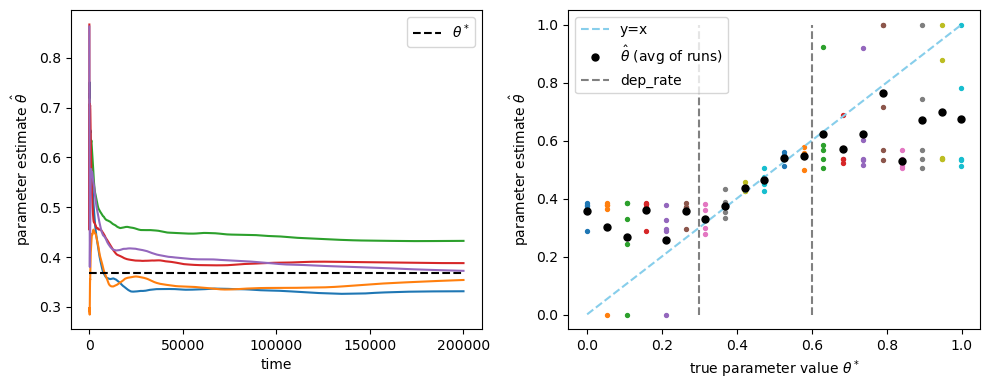

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

for i in range(num_init_vals):
    ax[0].plot(theta_hat_t_pravg[:,i,index_true])
ax[0].hlines(theta_star_all[index_true], time_axis[0], time_axis[-1], linestyles='dashed', colors='k', label=r'$\theta^*$')
ax[0].legend()
ax[0].set_xlabel('time')
ax[0].set_ylabel(r'parameter estimate $\hat{\theta}$')
ax[0].set_xticks([50000*i for i in range(5)])

for j in range(num_true_vals):
    # ax[1].scatter([theta_star_all[j] for _ in range(num_init_vals)], np.mean(theta_hat_t_all[-avg_over:,:,j], axis=0), s=5)
    ax[1].scatter([theta_star_all[j] for _ in range(num_init_vals)], theta_hat_t_pravg[-1,:,j], s=8)
ax[1].plot(theta_star_all, theta_star_all, color='skyblue', linestyle='--', label="y=x")
# ax[1].plot(theta_star_all, theta_hat_mean_all, color='b',marker='o', linestyle='', label=r"$\hat{\theta}$")
ax[1].plot(theta_star_all, theta_hat_mean_pravg, color='k',marker='o', linestyle='', markersize=5, label=r"$\hat{\theta}$ (avg of runs)")
ax[1].set_xlabel(r"true parameter value $\theta^*$")
ax[1].vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='gray')
ax[1].set_ylabel(r"parameter estimate $\hat{\theta}$")
# ax[1].set_title(r"$\hat{\theta}$ vs $\theta^*$: Queueing System")
ax[1].legend()

plt.tight_layout()

# plt.savefig('./figures/queueing_system_algo_performance.eps', dpi=300, bbox_inches='tight')

# Construct the log likelihood landscape for this case

In [80]:
from functions_queueing_system import *

In [82]:
numvals_x = M+1
numvals_o = 2
numvals_z = 2

x_vals = np.arange(numvals_x) #all values of x
o_vals = np.arange(numvals_o)
z_vals = np.arange(numvals_z)

theta_vals = np.linspace(1e-3, 1-1e-3, num=20)
LL_landscape = np.zeros((len(theta_vals),))
tic = time.time()
for i in range(len(theta_vals)):
    LL_landscape[i] = compute_log_likelihood_alldata(theta_estimate=theta_vals[i], O_t=O_t, \
                                                     Z_t=Z_t, T=T, z_vals=z_vals, o_vals=o_vals, \
                                                     x_vals=x_vals, K=K, dep_rate=dep_rate)
    if (i+1)%(len(theta_vals)//5)==0:
        print(f"{i+1} done")
toc = time.time()
print(f"Time={toc-tic}s")

4 done
8 done
12 done
16 done
20 done
Time=2811.983080148697s


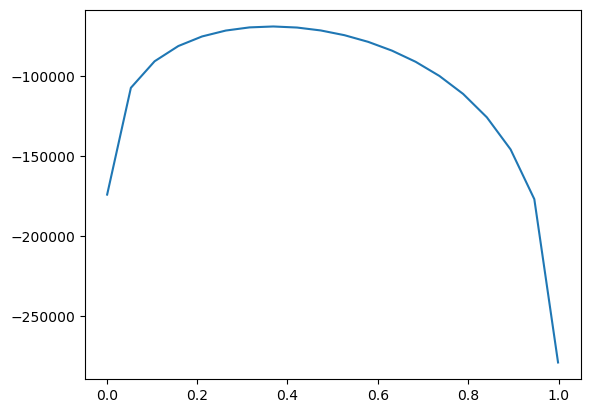

In [83]:
plt.plot(theta_vals, LL_landscape)

In [84]:
np.savez('./results/log-likelihood.npz', theta_vals=theta_vals, LL_landscape=LL_landscape)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


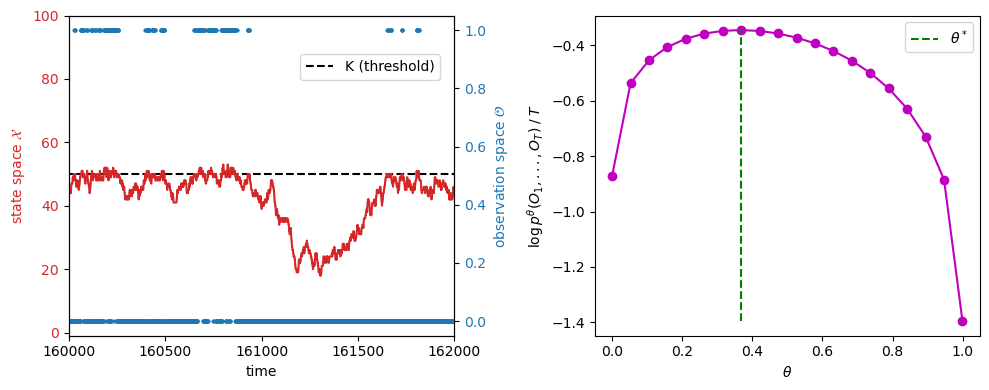

In [91]:
time_axis = np.arange(T)

# x_limits = [80000,80500]
# x_limits = [10000, 10500]
x_limits = [160000, 162000]
fig, ax = plt.subplots(1, 2, figsize=(10, 4), squeeze=True)

ax[0].plot([time_axis[0], time_axis[-1]],[K, K], 'k--', label='K (threshold)')
ax[0].set_ylim(-1,100)
ax[0].set_xlabel('time')
ax[0].set_xlim(x_limits[0],x_limits[1])
ax[0].set_xticks([x_limits[0]+500*i for i in range(5)])
# ax[0].set_title( r"$\bf{(A)}$ "+ r'Latent state and observations')

ax0b = ax[0].twinx()

color1 = 'tab:blue'
ax0b.set_ylabel('observation space '+r'$\mathcal{O}$', color=color1)
ax0b.plot(time_axis, O_t, color=color1, linestyle='', marker='o', markersize=2, label=r'$O_t$')
ax0b.tick_params(axis='y', labelcolor=color1)

color0 = 'tab:red'
ax[0].set_ylabel('state space '+r'$\mathcal{X}$', color=color0)
ax[0].plot(time_axis, X_t, color=color0)
ax[0].tick_params(axis='y', labelcolor=color0)

ax[0].legend(loc=(0.6, 0.8))

ax[1].plot(theta_vals, LL_landscape/T, 'mo-')
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r'$\log p^{\theta}(O_1, ..., O_T)\; / \; T$')
ax[1].vlines(theta_star_all[index_true], np.amin(LL_landscape/T), np.amax(LL_landscape/T), linestyles='dashed', colors='g', label=r'$\theta^*$')
ax[1].legend()
plt.tight_layout()
# plt.savefig('./figures/queueing_system_behaviour2.eps', dpi=300, bbox_inches='tight')

In [86]:
5

5